[Шаг 1. Откройте файл с данными и изучите общую информацию](#Шаг_1)

[Шаг 2. Подготовьте данные](#Шаг_2)

[Шаг 3. Проведите исследовательский анализ данных](#Шаг_3)

[Шаг 4. Составьте портрет пользователя каждого региона](#Шаг_4)

[Шаг 5. Проверьте гипотезы](#Шаг_5)

[Шаг 6. Напишите общий вывод](#Шаг_6)

<a id='Шаг_1'></a>

# ШАГ 1
<div class="alert alert-block alert-info">
<b><u>Откройте файл с данными и изучите общую информацию</b></u>

    
</div>

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/datasets/games.csv')
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

### <u>Вывод</u>
<b><u>
На первый взгляд, каких-то выдающихся ошибок в данных нет. Необходимо будет решить, что делать с нулевыми данными в критик скор, юзер скор и рейтинг, потому что очень большой объем, так просто не удалить. Есть некоторые погрешности в типах данных, которые необходимо будет исправить.
    
</b></u>

<a id='Шаг_2'></a>

# ШАГ 2
<div class="alert alert-block alert-info">
<b><u>Подготовьте данные</b></u>

    
Замените названия столбцов (приведите к нижнему регистру);
    
Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
    
Обработайте пропуски при необходимости:
    
Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
    
Опишите причины, которые могли привести к пропускам;
    
Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
    
Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.
    
</div>

<b><u> Описание </b></u>

<b>Меняем названия столбцов на нужные. Пустые данные в годе выпуска я решила удалить, поскольку заменить на что-то не кажется целесообразным, а потеря данных будет не так велика. Далее заменяем пустые данные в критик и юзер скор на нули. В столбце с рейтингом придется заменить на unknown. 
    
Большое количество пропусков в юзер, критик скор и в рейтинге можно объяснить либо изначальным отсутствием таких данных, либо ошибкой в выгрузке. я больше склоняюсь к ошибке в выгрузке, особенно потому что количество отсутствующих данных в юзер и критик скор примерно одинаковое. Такж, не кажется логичным отсутствие рейтинга у большого количества игр, скорее всего, тоже ошибка в выгрузке. 

Тип данных заменила в столбцах с годом выпуска и юзер скор, год выпуска логичнее видеть в целочисленном формате, а юзер скор невозможно будет считать, если не сделать его числовым. 

<i>Не понимаю, что здесь делать и нет такой аббревиатуры в рейтинге:</i>    
Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;</b>

In [5]:
data.columns = ['name','platform','year_of_release','genre','na_sales','eu_sales','jp_sales','other_sales','critic_score','user_score','rating']

In [6]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [7]:
#удаляем NA в годе выпуска, этими данными можно поступиться
data.dropna(subset = ['name','year_of_release','genre'], inplace = True)

In [8]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [9]:
data['critic_score'] = data['critic_score'].fillna(0)

In [10]:
data['user_score'] = data['user_score'].fillna(0)

<div class="alert alert-block alert-info">
   
а я и не использую print, в юпитере же просто выводится таблица, если ее вызвать, зачем использовать дополнительный метод?
    
</div>

In [11]:
data['rating'] = data['rating'].fillna('unknown')

In [12]:
#преобразовываем типы данных
data['year_of_release'] = data['year_of_release'].astype('int64')
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [13]:
data['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [14]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [15]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [16]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [17]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,unknown,0.01


### <u>Вывод</u>
<b><u>
Преобразовала и обработала необходимое из нашего дата-сета. Пока что-то, в общем, про данные сказать еще трудно. Но уже бросается в глаза разброс в общих продажах по всем регионам.

    
</b></u>

<a id='Шаг_3'></a>

# ШАГ 3
<div class="alert alert-block alert-info">
<b><u>Проведите исследовательский анализ данных</b></u>

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
    
Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
    
Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
    
Не учитывайте в работе данные за предыдущие годы.
    
Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
    
Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
    
Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
    
Соотнесите выводы с продажами игр на других платформах.
    
Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
    
</div>

In [18]:
import matplotlib.pyplot as plt

<b>Смотрим, сколько игр выпускалось в разные годы, видно, что бум начался только после 2000х, поэтому предыдущее время можно не особо считать.</b>

In [19]:
gameN_by_year = data.pivot_table(index=['year_of_release'], values = ['name'], aggfunc=['count'])
gameN_by_year

,count
,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16


<b>Далее обращаемся к изучению информации по платформам. </b>

In [20]:
sales_by_year = data.pivot_table(index=['platform','year_of_release'], values = ['total_sales'], aggfunc=['sum'])
sales_by_year = pd.DataFrame(sales_by_year.to_records())
sales_by_year

,platform,year_of_release,"('sum', 'total_sales')"
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27
...,...,...,...
233,XB,2008,0.18
234,XOne,2013,18.96
235,XOne,2014,54.07
236,XOne,2015,60.14


<b>Выбираем платформы с наибольшими суммарными продажами. По трем из них построим распределения по годам.
Видно, что, в среднем, наибольшая популярность платформы длится 8 лет. </b>

In [21]:
sales_by_platform = data.pivot_table(index=['platform'], values = ['total_sales'], aggfunc=['sum'])
sales_by_platform = pd.DataFrame(sales_by_platform.to_records())

In [22]:
sales_by_platform.sort_values("('sum', 'total_sales')", ascending=False)

,platform,"('sum', 'total_sales')"
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


In [23]:
(data
.query('platform in ("X360","PS3","PS2")')
.pivot_table(index=['platform','year_of_release'], values='total_sales',aggfunc=['sum'])
)

sum
                         total_sales
platform year_of_release            
PS2      2000                  39.17
         2001                 166.43
         2002                 205.38
         2003                 184.31
         2004                 211.81
         2005                 160.66
         2006                 103.42
         2007                  75.99
         2008                  53.90
         2009                  26.40
         2010                   5.64
         2011                   0.45
PS3      2006                  20.96
         2007                  73.19
         2008                 118.52
         2009                 130.93
         2010                 142.17
         2011                 156.78
         2012                 107.36
         2013                 113.25
         2014                  47.76
         2015                  16.82
         2016                   3.60
X360     2005                   8.25
         2006                  51.62
         2007                  95.41
         2008                 135.26
         2009                 120.29
         2010                 170.03
         2011                 143.84
         2012                  99.74
         2013                  88.58
         2014                  34.74
         2015                  11.96
         2016                   1.52

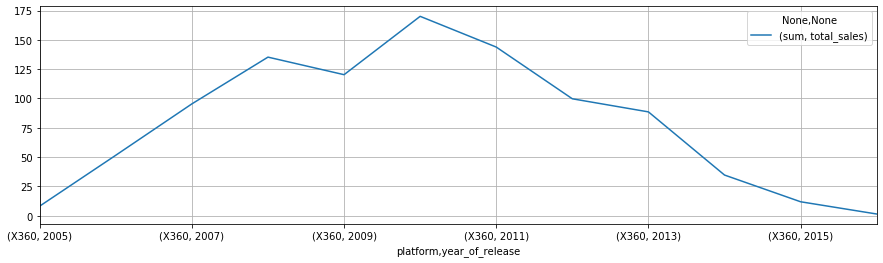

In [24]:
(data
.query('platform == "X360"')
.pivot_table(index=['platform','year_of_release'], values='total_sales',aggfunc=['sum'])
.plot(grid=True, figsize=(15, 4))
)

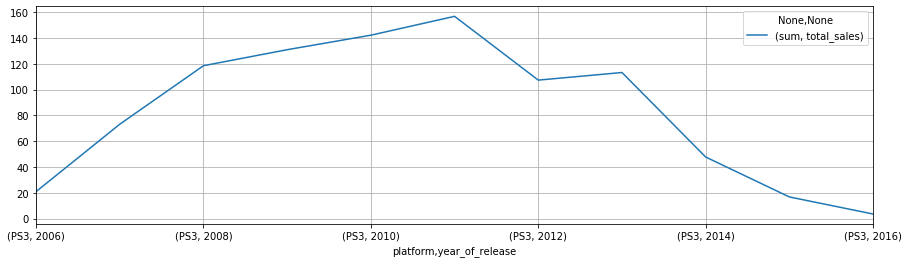

In [25]:
(data
.query('platform == "PS3"')
.pivot_table(index=['platform','year_of_release'], values='total_sales',aggfunc=['sum'])
.plot(grid=True, figsize=(15, 4))
)

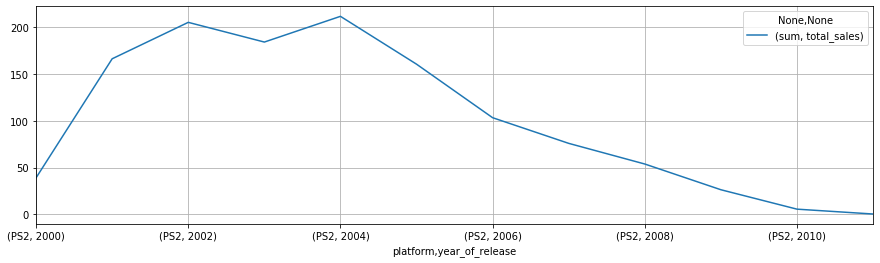

In [26]:
(data
.query('platform == "PS2"')
.pivot_table(index=['platform','year_of_release'], values='total_sales',aggfunc=['sum'])
.plot(grid=True, figsize=(15, 4))
)

In [27]:
import seaborn as sns

<div class="alert alert-block alert-info">
   
Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.
    
Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
    
</div>

<b>Я посчитала актуальным период после 2011 года, ориентируясь на количество выпускаемых в год игр. Заметный перелом в количестве произошел как раз в 2012 году, количество выпускаемых игр снизилось, поэтому целесообразно счиать период, в который количество выпускаемых в год игр более менее одинаково.  </b>

In [28]:
sales_by_platform1 = data.query("year_of_release > 2011").pivot_table(index=['platform','year_of_release'], values = ['total_sales'], aggfunc=['sum'])
sales_by_platform1

sum
                         total_sales
platform year_of_release            
3DS      2012                  51.36
         2013                  56.57
         2014                  43.76
         2015                  27.78
         2016                  15.14
DS       2012                  11.01
         2013                   1.54
PC       2012                  23.22
         2013                  12.38
         2014                  13.28
         2015                   8.52
         2016                   5.25
PS3      2012                 107.36
         2013                 113.25
         2014                  47.76
         2015                  16.82
         2016                   3.60
PS4      2013                  25.99
         2014                 100.00
         2015                 118.90
         2016                  69.25
PSP      2012                   7.69
         2013                   3.14
         2014                   0.24
         2015                   0.12
PSV      2012                  16.19
         2013                  10.59
         2014                  11.90
         2015                   6.25
         2016                   4.25
Wii      2012                  21.71
         2013                   8.59
         2014                   3.75
         2015                   1.14
         2016                   0.18
WiiU     2012                  17.56
         2013                  21.65
         2014                  22.03
         2015                  16.35
         2016                   4.60
X360     2012                  99.74
         2013                  88.58
         2014                  34.74
         2015                  11.96
         2016                   1.52
XOne     2013                  18.96
         2014                  54.07
         2015                  60.14
         2016                  26.15

<b>По продажам лидируют PS4 и XOne, лучшие прогнозы у них же,хотя , в общем, продажи все равно падают. </b>

<div class="alert alert-block alert-info">
   
  
Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
    
Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
    
Соотнесите выводы с продажами игр на других платформах.
    
Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
    
</div>

<b>строим ящик с усами</b>

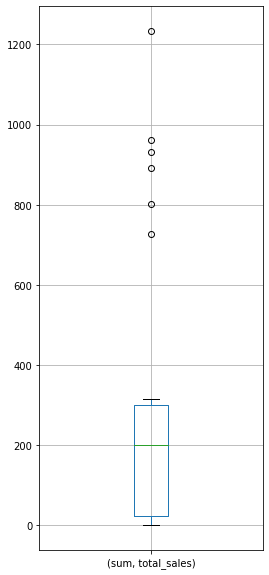

In [29]:
(data
.pivot_table(index=['platform'], values='total_sales',aggfunc=['sum'])
.boxplot(grid=True, figsize=(4,10))
)
#есть выбросы, которые влияют на общий вид ящиков, медиана лежит на 200.  

<b>Минимальное значение - мы видим, что минимальное значение по нашей выборке равно нулю.
Нижний квартиль - 25 % нашей выборки - это меньше примерно тридцати. 
Медиана - 50 % у нас стоит на 200, но датасет скошен вниз.
Верхний квартиль - 25 % выше 300.
И максимальный результат примерно 325.
Выбросы - те результаты тех платформ, которые и являются самыми прибыльными, но их результаты далеки от общей выборки, поэтому и попали в выбросы. </b>

<div class="alert alert-block alert-info">
    
Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
    
Соотнесите выводы с продажами игр на других платформах.
    
Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
    
</div>

<b>Готовим данные для дальнейших подсчетов влияния отзывов пользователей и критиков, а также для построения диаграммы рассеивания</b>

In [30]:
PS4_data = data.query("platform == 'PS4'")
PS4_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,0.0,0.0,unknown,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,unknown,0.01
16503,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,unknown,0.01
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16530,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


In [31]:
PS4_data = PS4_data[['total_sales','user_score','critic_score']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f42589be3d0>,
      dtype=object)

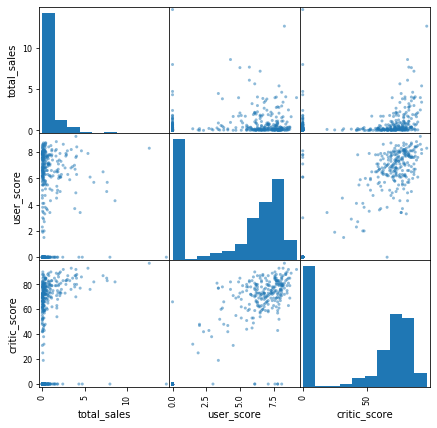

In [32]:
pd.plotting.scatter_matrix(PS4_data, figsize=(7,7))

In [33]:
PS4_data['total_sales'].corr(PS4_data['user_score'])

0.10493810283090232

In [34]:
PS4_data['total_sales'].corr(PS4_data['critic_score'])

0.2275496062775265

<b>По платформе PS4 - по диагармме рассеивания видно, что определенная закономерность между продажами и скором критиков и юзеров есть, определенный прирост продаж есть,чем выше скор. Однако, таких данных столь мало, что коэффициантом корреляции это почти не показывается. Корреляция продаж с критик скором равна 0.2, что, в принципе, довольно мало. Корреляция продаж и юзер скора еще меньше, всего 0.1 </b>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4258669890>,
      dtype=object)

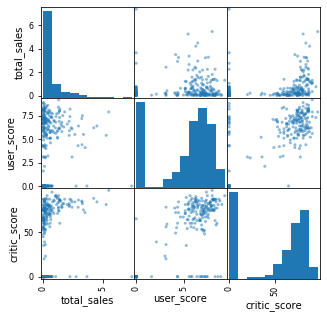

In [35]:
xone_data = data.query("platform == 'XOne'")
xone_data = xone_data[['total_sales','user_score','critic_score']]
pd.plotting.scatter_matrix(xone_data, figsize=(5,5))

In [36]:
xone_data['total_sales'].corr(xone_data['user_score'])

0.0802618590461051

In [37]:
xone_data['total_sales'].corr(xone_data['critic_score'])

0.2748391874944539

<b>В XOne прослеживается та же закономерность, корреляция продаж с критик скором чуть выше, но все равно слишком маленькая, всего 0.27, а вот корреляция продаж с юзер скором чуть меньше - 0.08</b>

<b>Здесь смотрим распределение игр по жанрам</b>

In [38]:
sales_by_genre = data.pivot_table(index=['genre'], values = ['total_sales'], aggfunc=['sum'])
sales_by_genre = pd.DataFrame(sales_by_genre.to_records())

In [39]:
sales_by_genre.sort_values("('sum', 'total_sales')", ascending=False)

,genre,"('sum', 'total_sales')"
0,Action,1716.52
10,Sports,1309.67
8,Shooter,1041.36
7,Role-Playing,931.08
4,Platform,825.55
3,Misc,790.29
6,Racing,723.49
2,Fighting,442.66
9,Simulation,387.96
5,Puzzle,239.89


<b>Определенно,выделяются жанры, по которым продажи наиболее высоки, и жанры с самыми низкими продажами. Выходит, делать игры в жанре Adventure или Strategy совсем не выгодно, тогда как Action или Sports очень даже :). Видимо, людям больше нравится принимать участие в чем-то более активном. </b>

### <u>Вывод</u>
<b><u>
Бросается в глаза то, что платформы совсем не долговечны, и, чтобы удерживать внимание играющих, а также чтобы не проседать в продажах, приходится отказываться от одних платформ и выпускать новые, которые могут поддерживать еще более красочные игры в любимых жанрах.

    
</b></u>

<a id='Шаг_4'></a>

# ШАГ 4
<div class="alert alert-block alert-info">
<b><u>Составьте портрет пользователя каждого региона</b></u>

Определите для пользователя каждого региона (NA, EU, JP):
    
    
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
    
Самые популярные жанры (топ-5). Поясните разницу.
    
Влияет ли рейтинг ESRB на продажи в отдельном регионе?
    
</div>

<b>PS2 и X360 держатся на самом верху рынков NA и EU, PS2 занимает 13 процентов обоих рынков, X360 - 13 на рынке NA и 11 на рынке EU. Wii и PS3 также держат весомые позиции и на том и другом рынках. Рынок JP сильно отличается, но PS2 остался в пятерке лучших и там и оставил за собой 10 проецентов рынка, лидер здесь DS с 13 процентами.   </b>

In [40]:
platform_in_na = data.pivot_table(index=['platform'], values='na_sales', aggfunc=['sum'])
platform_in_na = pd.DataFrame(platform_in_na.to_records())

In [41]:
platform_in_na['sales_percent'] = platform_in_na["('sum', 'na_sales')"] *100 / platform_in_na["('sum', 'na_sales')"].sum() 

In [42]:
platform_in_na.sort_values("('sum', 'na_sales')", ascending=False).head()

,platform,"('sum', 'na_sales')",sales_percent
28,X360,595.74,13.722238
16,PS2,572.92,13.196604
26,Wii,486.87,11.214533
17,PS3,390.13,8.986230
4,DS,380.31,8.760037


In [43]:
platform_in_eu = data.pivot_table(index=['platform'], values='eu_sales', aggfunc=['sum'])
platform_in_eu = pd.DataFrame(platform_in_eu.to_records())

In [44]:
platform_in_eu['sales_percent'] = platform_in_eu["('sum', 'eu_sales')"] *100 / platform_in_eu["('sum', 'eu_sales')"].sum() 

In [45]:
platform_in_eu.sort_values("('sum', 'eu_sales')", ascending=False).head()

,platform,"('sum', 'eu_sales')",sales_percent
16,PS2,332.63,13.861432
17,PS3,327.21,13.635568
28,X360,268.32,11.181491
26,Wii,258.32,10.764769
15,PS,212.39,8.850763


In [46]:
platform_in_jp = data.pivot_table(index=['platform'], values='jp_sales', aggfunc=['sum'])
platform_in_jp = pd.DataFrame(platform_in_jp.to_records())

In [47]:
platform_in_jp['sales_percent'] = platform_in_jp["('sum', 'jp_sales')"] *100 / platform_in_jp["('sum', 'jp_sales')"].sum() 

In [48]:
platform_in_jp.sort_values("('sum', 'jp_sales')", ascending=False).head()

,platform,"('sum', 'jp_sales')",sales_percent
4,DS,175.02,13.560714
15,PS,139.78,10.830286
16,PS2,137.54,10.656728
23,SNES,116.55,9.030404
2,3DS,100.62,7.796132


<b>Самые популярные жанры на рынках Сев.Америки и Европы практически идентичны с тройкой лидеров Action,Sports,Shooter. Другая картина в Японии. Здесь отсутствует Shooter,а самым популярным является жанр Role-Playing. Видимо, современным японцам заменили страсть к войне в реальности страстью к боям в несуществующих мирах. </b>

In [49]:
genre_in_na = data.pivot_table(index=['genre'], values='na_sales', aggfunc=['sum'])
genre_in_na = pd.DataFrame(genre_in_na.to_records())

In [50]:
genre_in_na.sort_values("('sum', 'na_sales')", ascending=False).head()

,genre,"('sum', 'na_sales')"
0,Action,863.17
10,Sports,671.20
8,Shooter,584.83
4,Platform,444.44
3,Misc,399.57


In [51]:
genre_in_eu = data.pivot_table(index=['genre'], values='eu_sales', aggfunc=['sum'])
genre_in_eu = pd.DataFrame(genre_in_eu.to_records())

In [52]:
genre_in_eu.sort_values("('sum', 'eu_sales')", ascending=False).head()

,genre,"('sum', 'eu_sales')"
0,Action,510.99
10,Sports,371.33
8,Shooter,314.52
6,Racing,234.49
3,Misc,210.60


In [53]:
genre_in_jp = data.pivot_table(index=['genre'], values='jp_sales', aggfunc=['sum'])
genre_in_jp = pd.DataFrame(genre_in_jp.to_records())

In [54]:
genre_in_jp.sort_values("('sum', 'jp_sales')", ascending=False).head()

,genre,"('sum', 'jp_sales')"
7,Role-Playing,353.39
0,Action,160.14
10,Sports,134.93
4,Platform,130.71
3,Misc,107.02


<b>Очень интересно, что по рынку Японии сразу ясно, что рейтинг не особо влияет на продажи, в отличие от рынков Европы и Америки, где закономерность прослеживается очень четкая, и продажи с рейтингом Е самые высокие. </b>

In [55]:
rating_in_na = data.pivot_table(index=['rating'], values='na_sales', aggfunc=['sum'])
rating_in_na = pd.DataFrame(rating_in_na.to_records())

In [56]:
rating_in_na['sales_percent'] = rating_in_na["('sum', 'na_sales')"] *100 / rating_in_na["('sum', 'na_sales')"].sum() 

In [57]:
rating_in_na.sort_values("('sum', 'na_sales')", ascending=False)

,rating,"('sum', 'na_sales')",sales_percent
1,E,1274.24,29.350765
8,unknown,1225.84,28.235923
7,T,747.60,17.220172
5,M,742.89,17.111682
2,E10+,345.50,7.958226
4,K-A,2.56,0.058967
3,EC,1.53,0.035242
0,AO,1.26,0.029023
6,RP,0.00,0.000000


In [58]:
rating_in_eu = data.pivot_table(index=['rating'], values='eu_sales', aggfunc=['sum'])
rating_in_eu = pd.DataFrame(rating_in_eu.to_records())

In [59]:
rating_in_eu['sales_percent'] = rating_in_eu["('sum', 'eu_sales')"] *100 / rating_in_eu["('sum', 'eu_sales')"].sum() 

In [60]:
rating_in_eu.sort_values("('sum', 'eu_sales')", ascending=False)

,rating,"('sum', 'eu_sales')",sales_percent
1,E,703.87,29.331828
8,unknown,609.65,25.405471
5,M,480.00,20.002667
7,T,421.79,17.576927
2,E10+,183.35,7.640602
0,AO,0.61,0.025420
4,K-A,0.27,0.011252
3,EC,0.11,0.004584
6,RP,0.03,0.001250


In [61]:
rating_in_jp = data.pivot_table(index=['rating'], values='jp_sales', aggfunc=['sum'])
rating_in_jp = pd.DataFrame(rating_in_jp.to_records())

In [62]:
rating_in_jp['sales_percent'] = rating_in_jp["('sum', 'jp_sales')"] *100 / rating_in_jp["('sum', 'jp_sales')"].sum() 

In [63]:
rating_in_jp.sort_values("('sum', 'jp_sales')", ascending=False)

,rating,"('sum', 'jp_sales')",sales_percent
8,unknown,836.74,64.831401
1,E,197.96,15.338127
7,T,150.70,11.676378
5,M,63.58,4.926238
2,E10+,40.20,3.114734
4,K-A,1.46,0.113122
0,AO,0.00,0.000000
3,EC,0.00,0.000000
6,RP,0.00,0.000000


### <u>Вывод</u>
<b><u>
В данном исследовании хорошо видна разница между рынками Запада и Азии. Насколько похожи западные рынки между собой, и насколько азиатские от них отличаются. Все-таки это два разных мира!

    
</b></u>

<a id='Шаг_5'></a>

# ШАГ 5
<div class="alert alert-block alert-info">
<b><u>Проверьте гипотезы</b></u>

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
    
Задайте самостоятельно пороговое значение alpha.
    
Поясните:
    
Как вы сформулировали нулевую и альтернативную гипотезы;
    
Какой критерий применили для проверки гипотез и почему.
    
</div>

<b>1. Нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Здесь мы используем критерий Стьюдента для проверки равенства средних двух генеральных совокупностей. Параметр equal_var = True, потому что дисперсии почти одинаковы</b>

<div class="alert alert-block alert-info">
    
Написала ниже, в выводах к этому шагу, дублирую здесь :)
   
Нулевые гипотезы строились из формата того, что в нулевой гипотезе всегда должен присутствовать знак равентства. Альтернативные гипотезы, соответственно, без знака равенства. Первую нулевую гипотезу мы отвергли, соответственно средние пользовательские рейтинги двух платформ разные. Вторую нулевую гипотезу также отвергли, соответственно, средние рейтинги двух жанров тоже разные. 
    
</div>

In [64]:
from scipy import stats as st

In [65]:
xone_info = data[data['platform'] == "XOne"]
xone_score = xone_info['user_score']
xone_score

99       0.0
165      7.9
179      5.4
242      6.4
270      6.2
        ... 
16630    8.2
16643    6.6
16645    0.0
16660    6.7
16672    NaN
Name: user_score, Length: 247, dtype: float64

In [66]:
xone_score = xone_score.dropna()

In [67]:
import numpy as np

In [68]:
print('дисперсия XOne',np.var(xone_score))

дисперсия XOne 8.967153655558747


In [69]:
PC_info = data[data['platform'] == "PC"]
PC_score = PC_info['user_score']
PC_score

85       7.6
138      7.3
192      4.0
195      0.0
218      8.2
        ... 
16690    0.0
16692    7.6
16696    5.8
16702    7.2
16705    5.8
Name: user_score, Length: 957, dtype: float64

In [70]:
PC_score = PC_score.dropna()

In [71]:
print('дисперсия PC',np.var(PC_score))

дисперсия PC 8.946131498767684


In [72]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(xone_score, PC_score, equal_var = True)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не можем отвергнуть нулевую гипотезу") 

p-значение: 0.00011628630981227402
Отвергаем нулевую гипотезу


<div class="alert alert-block alert-info">
   
поняла, спасибо!
    
</div>

<b>2. Нулевая гипотеза - средние пользовательские рейтинги жанров Action и Sports одинаковые. Здесь мы используем критерий Стьюдента для проверки равенства средних двух генеральных совокупностей. Параметр также equal_var = True, потому что дисперсии почти одинаковы</b>

In [73]:
action_info = data[data['genre'] == "Action"]
action_info = action_info['user_score']
action_info

16       8.2
17       9.0
23       8.1
24       8.7
38       8.5
        ... 
16692    7.6
16694    0.0
16695    NaN
16699    0.0
16710    0.0
Name: user_score, Length: 3307, dtype: float64

In [74]:
action_info = action_info.dropna()

In [75]:
print('дисперсия action',np.var(action_info))

дисперсия action 13.077774892242989


In [76]:
sports_info = data[data['genre'] == "Sports"]
sports_info = sports_info['user_score']
sports_info

0        8.0
3        8.0
13       7.7
15       7.4
77       4.3
        ... 
16676    0.0
16688    NaN
16693    0.0
16700    0.0
16711    0.0
Name: user_score, Length: 2306, dtype: float64

In [77]:
sports_info = sports_info.dropna()

In [78]:
print('дисперсия Sports',np.var(sports_info))

дисперсия Sports 13.34189605263158


In [79]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(sports_info, action_info, equal_var = True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не можем отвергнуть нулевую гипотезу") 

p-значение: 0.0008127536068819031
Отвергаем нулевую гипотезу


### <u>Вывод</u>
<b><u>
Нулевые гипотезы строились из формата того, что в нулевой гипотезе всегда должен присутствовать знак равентства. Альтернативные гипотезы, соответственно, без знака равенства. Первую нулевую гипотезу мы отвергли, соответственно средние пользовательские рейтинги двух платформ разные. Вторую нулевую гипотезу также отвергли, соответственно, средние рейтинги двух жанров тоже разные. 

    
</b></u>

<a id='Шаг_6'></a>

# ШАГ 6
<div class="alert alert-block alert-info">
<b><u>Напишите общий вывод</b></u>

</div>

### <u>Вывод</u>
<b><u>
По ходу данной работы данные были изучены и предобработаны, приведены к нужным типам. Был проведен анализ данных, в ходе котоого были изучены особенности продаж по платформам на протяжении всего времени существования, а также изучена зависимость продаж от жанров и платформ на разных мировых рынках. В конце работы были проверены гипотезы по выборочным платформам и жанрам. Относительно всего датасета можно сделать вывод о разности рынков Европы и Запада, и, если изучатьдальнкйшие продажи и прогнозы относительно каких-либо нововыходящих игр, необходимо учитывать особенности каждого рынка.
    
</b></u>